In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


# Reading the data


In [2]:
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [3]:
train_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [4]:
train_df.shape

(13636, 15)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


## Summary Statistics

In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,13636.0,1.210853e+02,1.169956e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13636.0,2.178599e+04,2.388319e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13636.0,1.452039e-02,1.373234e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


## Checking if there is any null values in our dataset

In [7]:
train_df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

We have found 2 null values in our training data. We will deal with this later.

In [8]:
test_df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

As we can see, we don't have any null values in our test dataset. We do not have to worry about replacing null values in our dataset.

## Drop rows with Missing Values

In [9]:
train_df.dropna(inplace=True)

# EDA

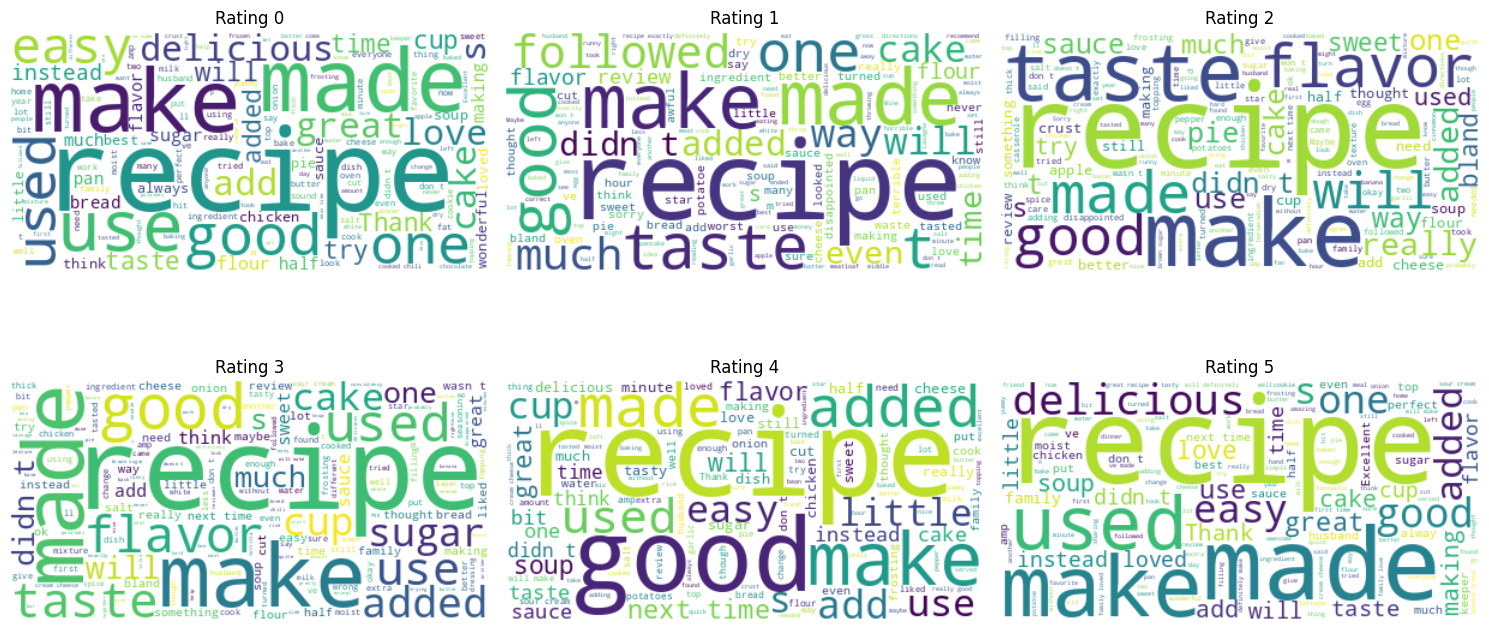

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df = train_df.copy()
df = df.dropna()

ratings_to_visualize = [0, 1, 2, 3, 4, 5]


num_cols = 3


num_rows = (len(ratings_to_visualize) + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))


for i, rating in enumerate(ratings_to_visualize):
    filtered_comments = df[df['Rating'] == rating]['Recipe_Review']
    
    
    text = ' '.join(filtered_comments)
    
    
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)

    
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f'Rating {rating}')
    axes[row, col].axis('off')


plt.tight_layout()
plt.show()

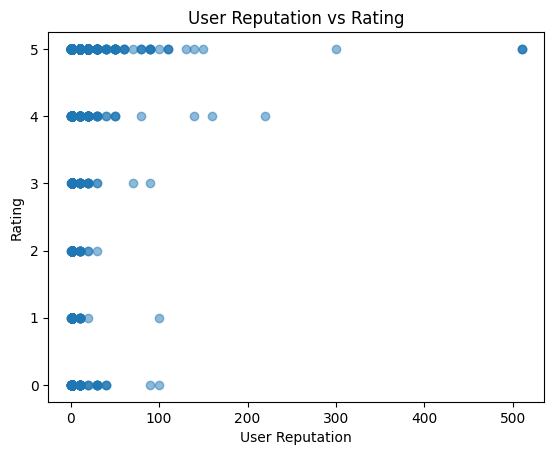

In [11]:
import matplotlib.pyplot as plt

df = train_df.copy()


# Plot the scatter plot
plt.scatter(df["UserReputation"], df["Rating"], alpha=0.5)
plt.title("User Reputation vs Rating")
plt.xlabel("User Reputation")
plt.ylabel("Rating")
plt.show()


# Feature Engineering

In [12]:
train_df.head(5)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


## Co-relation heatmap

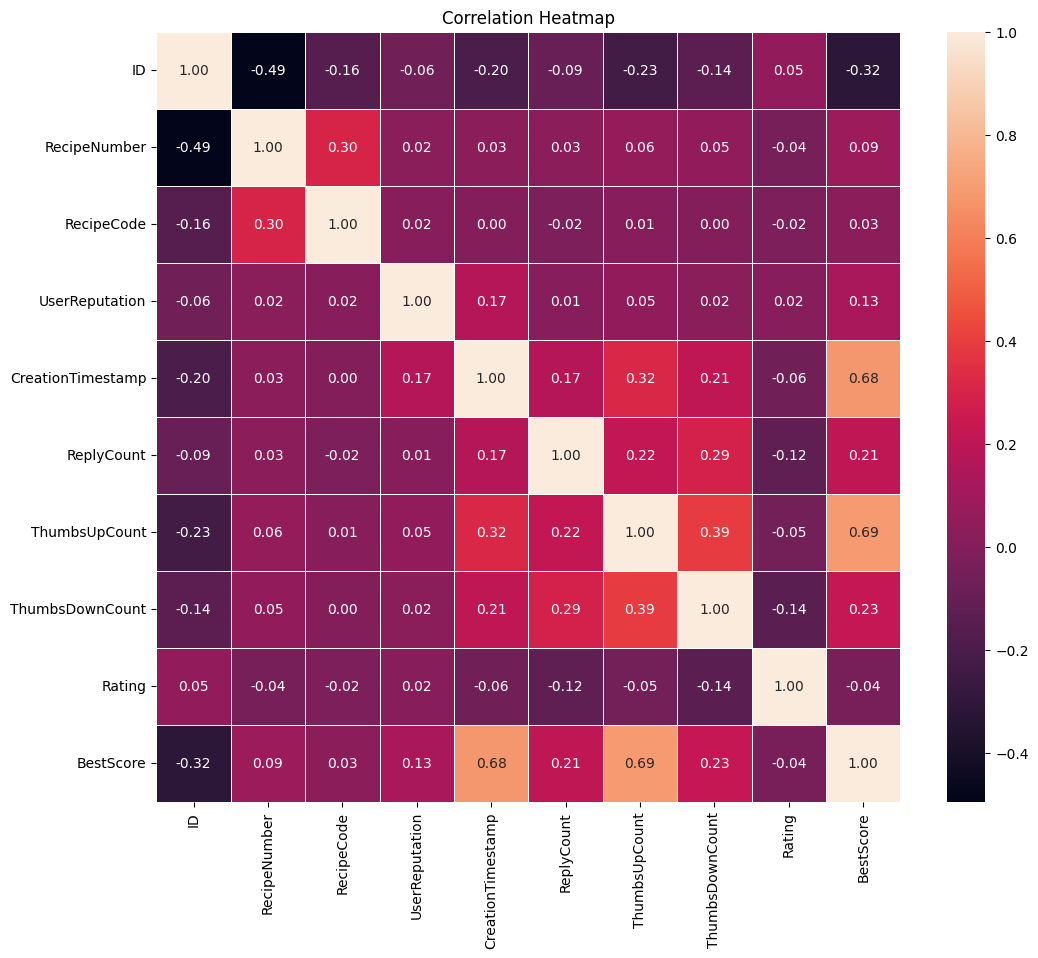

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df = train_df.copy()


numeric_columns = df.select_dtypes(include=['int64']).columns


correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


Based on the above heatmap, I could not be able to find any meaningful co reltion between columns. However I can see the strong co reation between BestScore and ThumbsUpCount but that is not useful for our ratings prediction.

## Creating a single column using ThumbsUpCount and ThumbsDownCount(It will reduce the number of column by 1)

In [14]:
train_df['ThumbsRatio'] = train_df['ThumbsUpCount'] / train_df['ThumbsDownCount']
test_df['ThumbsRatio'] = test_df['ThumbsUpCount'] / test_df['ThumbsDownCount']

## Replacing the na values(which was created upon division with zero) with "0" in our new column

In [15]:
train_df['ThumbsRatio'] = train_df['ThumbsRatio'].fillna(0)
test_df['ThumbsRatio'] = test_df['ThumbsRatio'].fillna(0)

# Counting the frequency of words in our "Recipe_Review" column for better insights

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

reviews = train_df['Recipe_Review']


count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(reviews)


word_count_df = pd.DataFrame(count_matrix.sum(axis=0), columns=count_vectorizer.get_feature_names_out())
word_count_df = word_count_df.transpose()
word_count_df.columns = ['Count']


top_words = word_count_df.sort_values(by='Count', ascending=False).head(25)
print("Top Words by Count:")
print(top_words)


Top Words by Count:
           Count
recipe      7454
39          7210
make        4470
used        3233
good        2771
time        2411
delicious   2361
great       2261
added       2141
easy        2110
just        2043
family      1950
use         1933
like        1789
loved       1699
cake        1481
love        1460
add         1444
did         1442
soup        1404
instead     1377
34          1343
cheese      1315
really      1286
chicken     1265


As we can see from the results of the frequency counts of the words in Recipe_Review column, there are some ambiguous values like "39" and "34" which are not of our use. So we have to remove these. Similary we will do this with the word "recipe" and "Recipe".

In [17]:
train_df['Recipe_Review'] = train_df['Recipe_Review'].str.replace('39', '')
test_df['Recipe_Review'] = test_df['Recipe_Review'].str.replace('39', '')


train_df['Recipe_Review'] = train_df['Recipe_Review'].str.replace('34', '')
test_df['Recipe_Review'] = test_df['Recipe_Review'].str.replace('34', '')

In [18]:
common_words_to_remove = ['recipe', 'cake', 'soup' 'chicken']
train_df['Recipe_Review'] = train_df['Recipe_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in common_words_to_remove]))
test_df['Recipe_Review'] = test_df['Recipe_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in common_words_to_remove]))

We are removing words here which are not useful for determining ratings in our project. Like cake,soup etc.

In [19]:
train_df.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review', 'ThumbsRatio'],
      dtype='object')

In [20]:
columns_to_drop_from_train = ['ID', 'RecipeName', 'RecipeNumber', 'CommentID', 'UserName', 'Rating', 'CreationTimestamp', 'ThumbsUpCount', 'ThumbsDownCount']

Here we are dropping ID,RecipeName and RecipeNumber because we alreayd have RecipeCode for identyfying particular recipies. CommentID,UserName,Rating,CreationTimeStamp are not very useful for our Rating Prediction. ThumbsUpCount and ThumbsDownCounts have already been taken as ThumbsRatio so we can also drop them.

In [21]:
X = train_df.drop(columns_to_drop_from_train, axis=1)
y = train_df['Rating']

In [22]:
X.head(5)

,RecipeCode,UserID,UserReputation,ReplyCount,BestScore,Recipe_Review,ThumbsRatio
0,12259,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,20,0,100,great recipe! I have made them just as written...,0.0
1,8202,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,1,0,100,This is an easy and quick that is great for th...,0.0
2,2832,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,1,0,100,I think I was looking for something extra spec...,0.0
3,100276,u_1oKZCQcKQZdQhDVBS7oISc216VA,1,0,100,This is our favorite grilled chicken recipe. G...,0.0
4,19731,u_1oKd4sudZQPgu6YALiC7bW7mKMs,1,0,100,Great basic recipe. I added 2 teaspoons Tuscan...,0.0


In [23]:
y.head(5)

0    5
1    5
2    3
3    5
4    4
Name: Rating, dtype: int64

In [24]:
test_df = test_df.drop(['ID', 'RecipeName', 'RecipeNumber', 'CommentID', 'UserName', 'CreationTimestamp', 'ThumbsUpCount', 'ThumbsDownCount'], axis=1)

Similar thing has been done here as done in train.

# Making Pipeline after train_test_split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [26]:
X.columns

Index(['RecipeCode', 'UserID', 'UserReputation', 'ReplyCount', 'BestScore',
       'Recipe_Review', 'ThumbsRatio'],
      dtype='object')

In [27]:
text_column = 'Recipe_Review'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

text_transformer = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(stop_words='english'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, text_column),
        ('cat', cat_transformer, ['RecipeCode', 'UserID'])
    ])

# Models

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logistic_model)])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Calculating the accuracy score of our predicted data using Logistic Regression Model

In [30]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy using Logistic Regression Model: {accuracy}')

Accuracy using Logistic Regression Model: 0.7785111844517785


## Applying Cross Validation on Logistic regression model

In [31]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', logistic_model)])


cv_results = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')  

print(f'Cross-Validation Accuracy: {cv_results.mean()} +/- {cv_results.std()}')


Cross-Validation Accuracy: 0.7705139083434932 +/- 0.002510142020070024


## Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_model)])
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Calculating the accuracy score of our predicted data using Random Forest

In [33]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy using Random Forest : {accuracy}')

Accuracy using Random Forest : 0.7755775577557755


## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn_model)])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Calculating the accuracy score of our predicted data using KNN

In [35]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy using KNN: {accuracy}')

Accuracy using KNN: 0.7348734873487349


## SVM 

In [36]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  

clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', svm_model)])

clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)


### Calculating the accuracy score of our predicted data using SVM

In [37]:
accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)

print(f'Accuracy using SVM: {accuracy}')

Accuracy using SVM: 0.7847451411807848


## Hyperparameters tuning the SVM

In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svm_model = SVC()


clf_svm2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', svm_model)])


param_grid = {
    'classifier__C': [0.1, 1, 10],  
    'classifier__kernel': ['linear'],  
}


grid_search = GridSearchCV(clf_svm2, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_clf_svm = grid_search.best_estimator_


y_pred_svm = best_clf_svm.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)


print(f'SVM Accuracy (after hyperparameter tuning): {accuracy_svm}')
# print('Classification Report for SVM:\n', classification_rep_svm)


SVM Accuracy (after hyperparameter tuning): 0.7847451411807848


## XGBoost

In [39]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()


clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', xgb_model)])


clf_xgb.fit(X_train, y_train)


y_pred_xgb = clf_xgb.predict(X_test)


### Calculating the accuracy score of our predicted data using XGBoost

In [40]:
accuracy = accuracy_score(y_test, y_pred_xgb)
classification_rep = classification_report(y_test, y_pred_xgb)

print(f'Accuracy using XGBoost : {accuracy}')

Accuracy using XGBoost : 0.7774110744407774


## Hyperparameters tuning the XGBoost Model

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


xgb_model = XGBClassifier()


clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', xgb_model)])


param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],  
    'classifier__max_depth': [3, 5, 7],  
    'classifier__n_estimators': [50, 100, 200], 
}


grid_search = GridSearchCV(clf_xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_clf_xgb = grid_search.best_estimator_


y_pred_xgb = best_clf_xgb.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)


print(f'XGBoost Accuracy (after hyperparameter tuning): {accuracy_xgb}')
print('Classification Report for XGBoost:\n', classification_rep_xgb)




XGBoost Accuracy (after hyperparameter tuning): 0.7785111844517785
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.12      0.20       238
           1       0.64      0.17      0.27        41
           2       0.22      0.05      0.08        40
           3       0.38      0.15      0.22        78
           4       0.37      0.09      0.14       248
           5       0.80      0.99      0.88      2082

    accuracy                           0.78      2727
   macro avg       0.50      0.26      0.30      2727
weighted avg       0.72      0.78      0.72      2727



# Model Scores Comparision

In [42]:
logistic_accuracy= 0.778511
randomforest_accuracy = 0.775577
knn_accuracy = 0.737873
svm_accuracy = 0.784745
xgboost_accuracy = 0.777411

## Comparision Chart for all Models

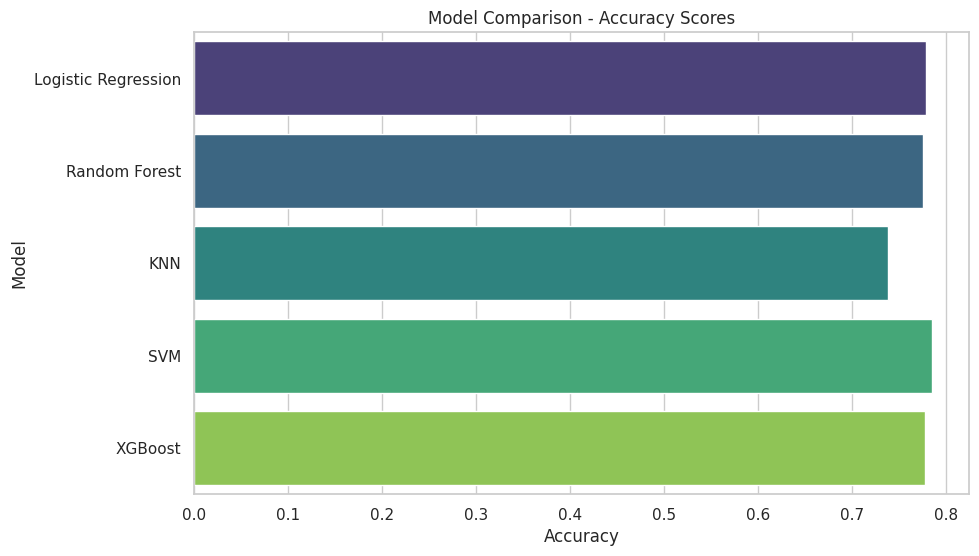

In [43]:
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'XGBoost']
accuracies = [0.778511, 0.775577, 0.737873, 0.784745, 0.777411]


data = {'Model': models, 'Accuracy': accuracies}
df = pd.DataFrame(data)


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


## As we can see from the above graph, SVM has got the highest accuracy score. Therefore we will use SVM Model for predicting our outputs.

In [44]:
test_predictions = clf_svm.predict(test_df) 

submission_df = pd.DataFrame({ 

    'ID': range(1, len(test_predictions) + 1),  

    'Rating': test_predictions 

}) 



submission_df.to_csv('submission.csv', index=False)  
print(submission_df.head())  

   ID  Rating
0   1       5
1   2       5
2   3       5
3   4       0
4   5       5
